In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

# Generate random data
np.random.seed(3)
n_dentro = 5
x_dentroAmostra = np.sort(5 * np.random.rand(n_dentro))
target = 10*x_dentroAmostra**2 + 8*x_dentroAmostra + 0.2
y_dentroAmostra = target + np.random.normal(0, 10, n_dentro)

vies = np.ones((len(x_dentroAmostra),))

def transformacaoNaoLinear(X):
    z_dentro = np.zeros((X.shape[0], 5))
    z_dentro[:, 0] = np.ones((len(X),))
    z_dentro[:, 1] = X
    z_dentro[:, 2] = X ** 2
    z_dentro[:, 3] = X ** 3
    z_dentro[:, 4] = X ** 4
    return z_dentro

z_dentro = transformacaoNaoLinear(x_dentroAmostra)  # Pass the entire X array here
print(z_dentro)

[[  1.           1.45452369   2.11563918   3.07724731   4.47592913]
 [  1.           2.55413803   6.52362106  16.66222861  42.55763168]
 [  1.           2.75398951   7.58445824  20.88751845  57.52400675]
 [  1.           3.54073911  12.53683347  44.38965661 157.17219338]
 [  1.           4.46473477  19.93385658  88.99938262 397.35863823]]


In [134]:
# Column names for z_dentro
transformacao_variaveis_nomes = [
    "viés (intercepto)",
    "x",
    "x²",
    "x³",
    "x⁴",
]


In [135]:
from prettytable import PrettyTable
# Create a PrettyTable instance
table = PrettyTable()
table.field_names = transformacao_variaveis_nomes

# Add rows to the table
for row in z_dentro:
    table.add_row(row)

print(table)

+-------------------+--------------------+-------------------+--------------------+--------------------+
| viés (intercepto) |         x          |         x²        |         x³         |         x⁴         |
+-------------------+--------------------+-------------------+--------------------+--------------------+
|        1.0        | 1.4545236945647217 | 2.115639178050208 | 3.0772473136234595 | 4.475929131700959  |
|        1.0        | 2.554138025988315  | 6.523621055799487 | 16.66222860575551  | 42.557631679670415 |
|        1.0        | 2.7539895128728773 | 7.584458237013788 | 20.887518445558285 |  57.5240067490063  |
|        1.0        | 3.540739113090524  | 12.53683346696907 | 44.38965661079966  | 157.17219337851571 |
|        1.0        | 4.464734771738273  | 19.93385658196881 |   88.99938261636   | 397.3586382305013  |
+-------------------+--------------------+-------------------+--------------------+--------------------+


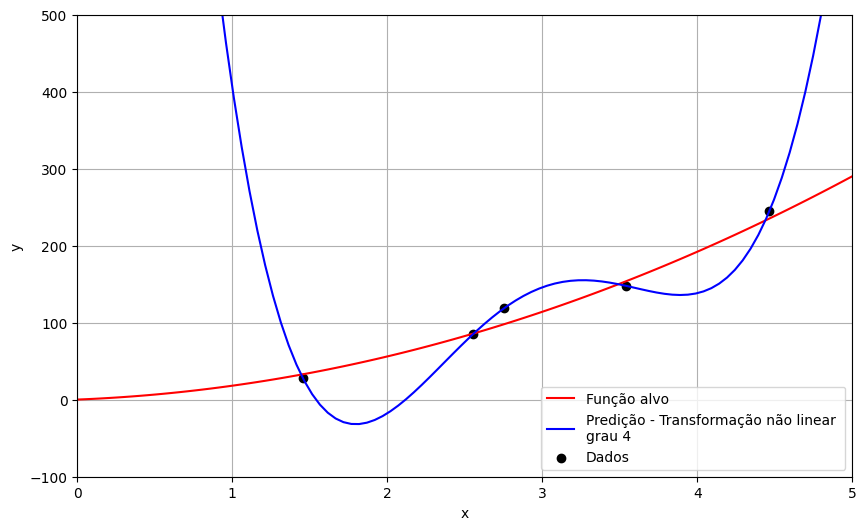

In [136]:
# Generate X1 values for plotting
X1_plot = np.linspace(0, 5, 100)

# Calculate target values for the given formula
target_curve = 10 * X1_plot**2 + 8 * X1_plot + 0.2

# Fit linear regression on transformed data
linear_model = LinearRegression()
linear_model.fit(z_dentro, y_dentroAmostra)

#linear_model.coef_[0] += linear_model.intercept_
# Insert the intercept as the first element of linear_model.coef_
linear_model.coef_[0] += linear_model.intercept_
predicted_curve = sum(linear_model.coef_[i] * X1_plot**i for i in range(5))


# Plotting the target curve
plt.figure(figsize=(10, 6))
plt.plot(X1_plot, target_curve, color='red', label='Função alvo')
plt.plot(X1_plot, predicted_curve, color='blue', label='Predição - Transformação não linear \ngrau 4')
plt.scatter(x_dentroAmostra, y_dentroAmostra, color='black', label='Dados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('')
plt.legend()
plt.xlim(0,5)
plt.ylim(-100,500)
plt.grid()
plt.show()


In [137]:
# Create a PrettyTable instance
table = PrettyTable()
table.field_names = transformacao_variaveis_nomes

# Add rows to the table

table.add_row(linear_model.coef_)

print(table)

+--------------------+--------------------+--------------------+--------------------+-------------------+
| viés (intercepto)  |         x          |         x²         |         x³         |         x⁴        |
+--------------------+--------------------+--------------------+--------------------+-------------------+
| 3743.4739305181884 | -5962.718165987141 | 3339.8000090358396 | -780.1106672135459 | 65.37520735593353 |
+--------------------+--------------------+--------------------+--------------------+-------------------+


In [138]:
n_fora = 50
x_foraAmostra = np.sort(5 * np.random.rand(n_fora))
target = 10*x_foraAmostra**2 + 8*x_foraAmostra + 0.2
y_foraAmostra = target + np.random.normal(0, 10, n_fora)

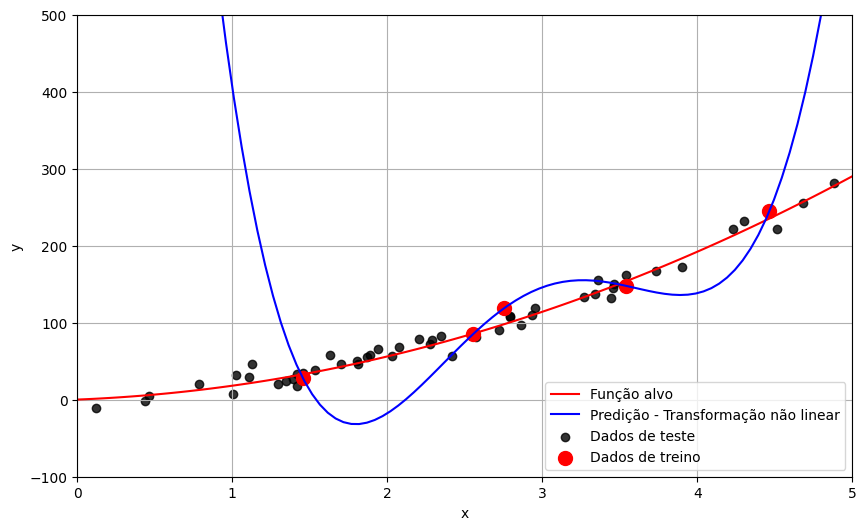

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the target curve
plt.figure(figsize=(10, 6))
plt.plot(X1_plot, target_curve, color='red', label='Função alvo')
plt.plot(X1_plot, predicted_curve, color='blue', label='Predição - Transformação não linear')
plt.scatter(x_foraAmostra, y_foraAmostra, color='black', label='Dados de teste', alpha = 0.8)
plt.scatter(x_dentroAmostra, y_dentroAmostra, color='red', label='Dados de treino', s = 100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('')
plt.legend()
plt.xlim(0,5)
plt.ylim(-100,500)
plt.grid()
plt.show()


c:\Users\luanc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.586e+02, tolerance: 2.579e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\luanc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.786e+02, tolerance: 2.579e+00
  model = cd_fast.enet_coordinate_descent(


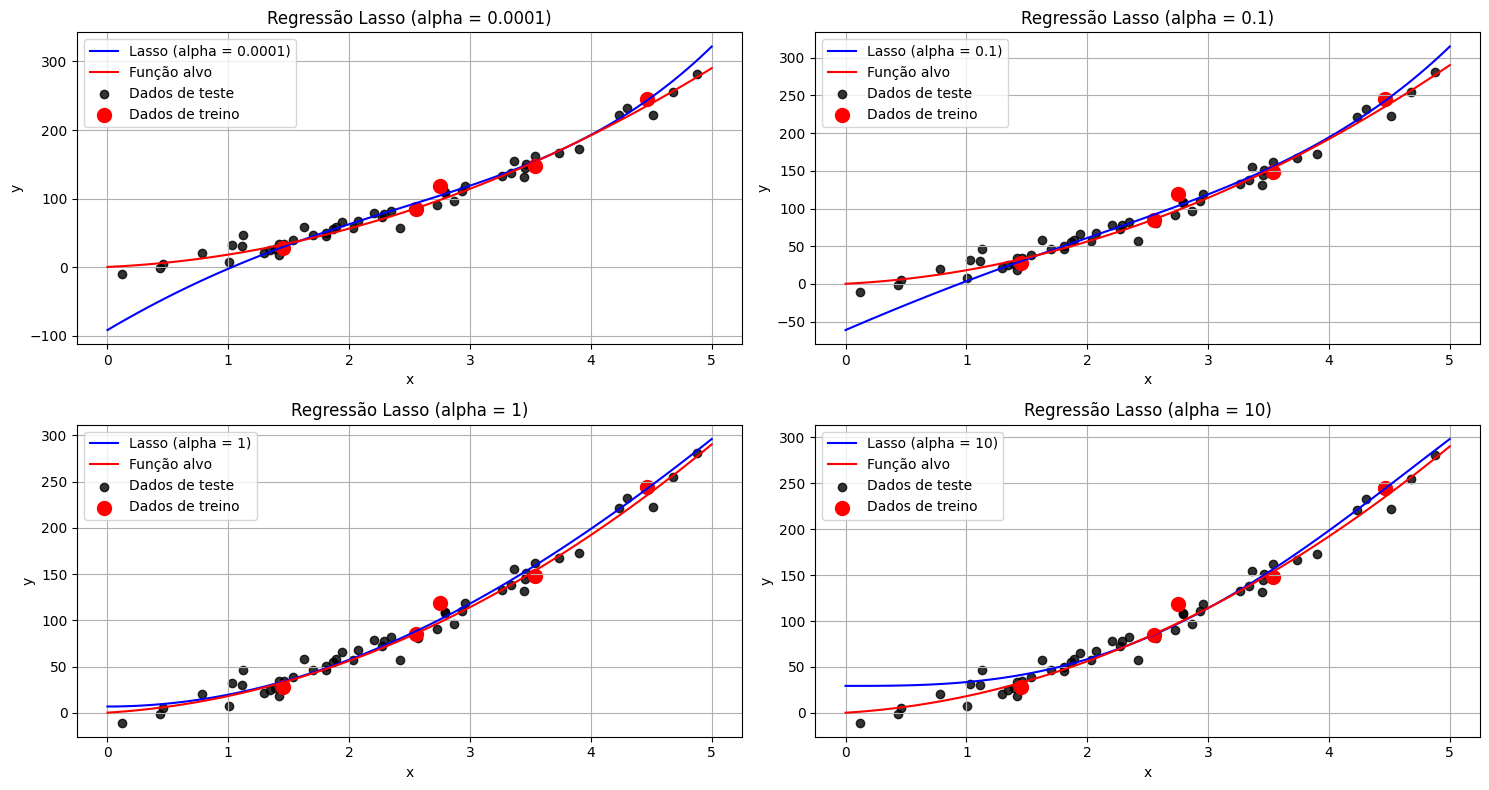

In [140]:
import numpy as np
import matplotlib.pyplot as plt

alpha_values = [0.0001, 0.1, 1, 10]

num_plots = len(alpha_values)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(15, 8))

for idx, alpha in enumerate(alpha_values):
    plt.subplot(num_rows, num_cols, idx+1)
    
    # Fit Lasso regression on transformed data
    Lasso_model = Lasso(alpha=alpha)
    Lasso_model.fit(z_dentro, y_dentroAmostra)

    Lasso_model.coef_[0] += Lasso_model.intercept_
    predicted_curve = sum(Lasso_model.coef_[i] * X1_plot**i for i in range(5))
        
    # Plotting the target curve and data points
    plt.plot(X1_plot, predicted_curve, color='blue', label=f'Lasso (alpha = {alpha})')
    plt.plot(X1_plot, target_curve, color='red', label='Função alvo')
    plt.scatter(x_foraAmostra, y_foraAmostra, color='black', label='Dados de teste', alpha = 0.8)
    plt.scatter(x_dentroAmostra, y_dentroAmostra, color='red', label='Dados de treino', s = 100)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Regressão Lasso (alpha = {alpha})')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


In [141]:
z_fora = transformacaoNaoLinear(x_foraAmostra) 
# Create a PrettyTable instance
table = PrettyTable()
table.field_names = transformacao_variaveis_nomes

# Add rows to the table
for row in z_fora[:5]:
    table.add_row(row)

print(table)

+-------------------+---------------------+----------------------+-----------------------+------------------------+
| viés (intercepto) |          x          |          x²          |           x³          |           x⁴           |
+-------------------+---------------------+----------------------+-----------------------+------------------------+
|        1.0        | 0.11990941188582682 | 0.014378267058804867 | 0.0017240895469586486 | 0.00020673456361431316 |
|        1.0        | 0.43614684390402336 | 0.19022406944744052  |  0.08296562752408095  |  0.03618519659714468   |
|        1.0        |  0.4610850443586212 | 0.21259941813119168  |  0.09802641213963756  |  0.04519851258972127   |
|        1.0        |  0.7843386923748163 |  0.6151871843562368  |  0.48251511174371586  |  0.37845527179615446   |
|        1.0        |  1.0068935552153657 |  1.0138346315342388  |    1.02082355654597   |   1.0278606600981657   |
+-------------------+---------------------+----------------------+------

In [145]:
for idx, alpha in enumerate(alpha_values):
   
    # Fit Lasso regression on transformed data
    Lasso_model = Lasso(alpha=alpha)
    Lasso_model.fit(z_dentro, y_dentroAmostra)

    predicao = Lasso_model.predict(z_fora)
    mse = mean_squared_error(predicao, y_foraAmostra)

    print(f"Erro médio quadrático nos dados de teste com parâmetro de regularização alpha = {alpha}: {round(mse, 2)}")

Erro médio quadrático nos dados de teste com parâmetro de regularização alpha = 0.0001: 378.02
Erro médio quadrático nos dados de teste com parâmetro de regularização alpha = 0.1: 221.86
Erro médio quadrático nos dados de teste com parâmetro de regularização alpha = 1: 99.88
Erro médio quadrático nos dados de teste com parâmetro de regularização alpha = 10: 169.11


c:\Users\luanc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.586e+02, tolerance: 2.579e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\luanc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.786e+02, tolerance: 2.579e+00
  model = cd_fast.enet_coordinate_descent(


# Validação

In [164]:
from sklearn import datasets
import pandas as pd

# load iris dataset
iris = datasets.load_iris()
# Since this is a bunch, create a dataframe
iris_df=pd.DataFrame(iris.data)
iris_df.columns= iris.feature_names
iris_df['class']=iris.target

class_mapping = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
iris_df['class'] = iris_df['class'].map(class_mapping)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


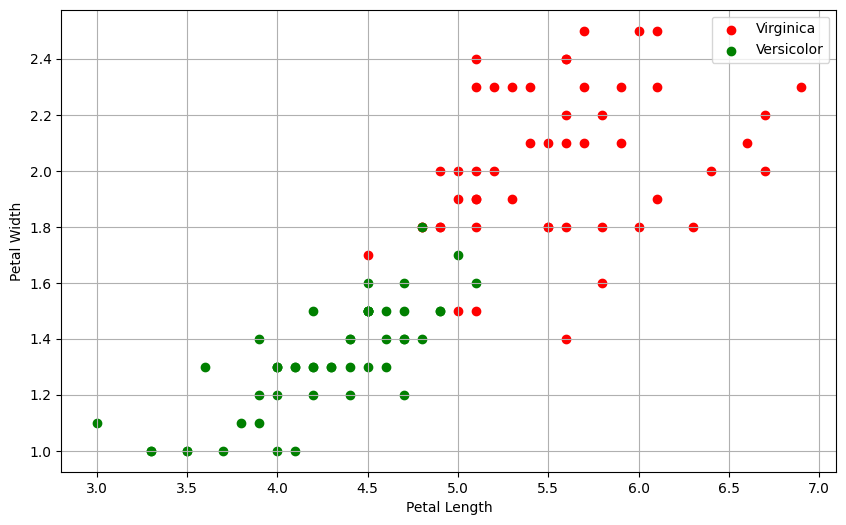

In [168]:
import matplotlib.pyplot as plt

# Filter data for classes Virginica and Versicolor
filtered_df = iris_df[iris_df['class'].isin(['Virginica', 'Versicolor'])]

# Set colors for each class
colors = {'Virginica': 'red', 'Versicolor': 'green'}

# Create a scatter plot
plt.figure(figsize=(10, 6))
for class_name, color in colors.items():
    class_data = filtered_df[filtered_df['class'] == class_name]
    plt.scatter(class_data['petal length (cm)'], class_data['petal width (cm)'], color=color, label=class_name)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.grid()
plt.show()